train_mean: [0.93333333 0.93333333 0.935      0.97333333 0.985      0.98
 0.98333333]
train_std: [0.01748015 0.01748015 0.01855921 0.01224745 0.0062361  0.01130388
 0.01054093]
test_mean: [0.92666667 0.92666667 0.92       0.96666667 0.98       0.97333333
 0.96      ]
test_std =: [0.02494438 0.02494438 0.02666667 0.02108185 0.01632993 0.03887301
 0.03887301]
Best Score: 0.9800000000000001
Best Parameter: 10.0


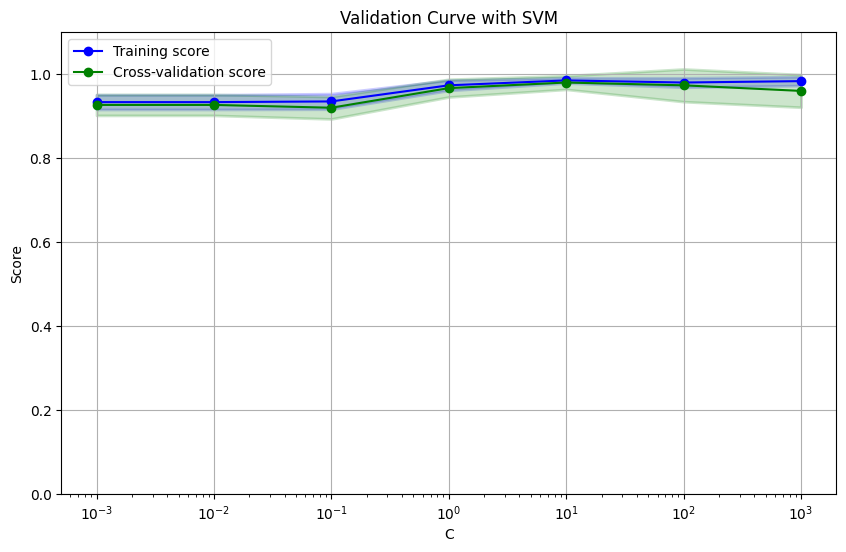

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define parameter range for C
param_range = np.logspace(-3, 3, 7)

# Calculate validation curve
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="C", param_range=param_range, cv=5, scoring="accuracy", n_jobs=-1
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print('train_mean:', train_mean)
print('train_std:', train_std)
print('test_mean:', test_mean)
print('test_std =:', test_std)

# Find index of best test score
best_score_index = np.argmax(test_mean)
best_score = test_mean[best_score_index]
best_param = param_range[best_score_index]

# Print the best score and corresponding parameter
print("Best Score:", best_score)
print("Best Parameter:", best_param)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_mean, label="Training score",
             color="blue", marker="o")
plt.fill_between(
    param_range,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2,
    color="blue",
    lw=2
)
plt.semilogx(param_range, test_mean,
             label="Cross-validation score", color="green", marker="o")
plt.fill_between(
    param_range,
    test_mean - test_std,
    test_mean + test_std,
    alpha=0.2,
    color="green",
    lw=2
)
plt.legend(loc="best")
plt.grid()
plt.show()
